In [1]:
%cd ../

/home/pristalovya/Inter/Programming/DC/PhysicalDot-DistributedSimulation


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,13)})
sns.set (font_scale=2)
sns.set_style("ticks",{'axes.grid' : True})

In [117]:
stat = pd.read_csv('./experiments/bodies/exp_data.multi_thread_repeated_threading.txt')
stat

,n_bodies,n_threads,n_retries,mean_comp_time,hyper_threading
0,120,1,21,0.526916,True
1,120,2,21,0.454431,True
2,120,4,21,0.465987,True
3,120,6,21,0.593191,True
4,120,12,21,1.016659,True
...,...,...,...,...,...
195,2400,24,10,30.430409,True
196,2400,30,11,29.106956,True
197,2400,40,11,29.736714,True
198,2400,60,10,30.832672,True


In [118]:
print(stat.dtypes)
stat.n_threads = stat.n_threads.astype('category')

n_bodies             int64
n_threads            int64
n_retries            int64
mean_comp_time     float64
hyper_threading       bool
dtype: object


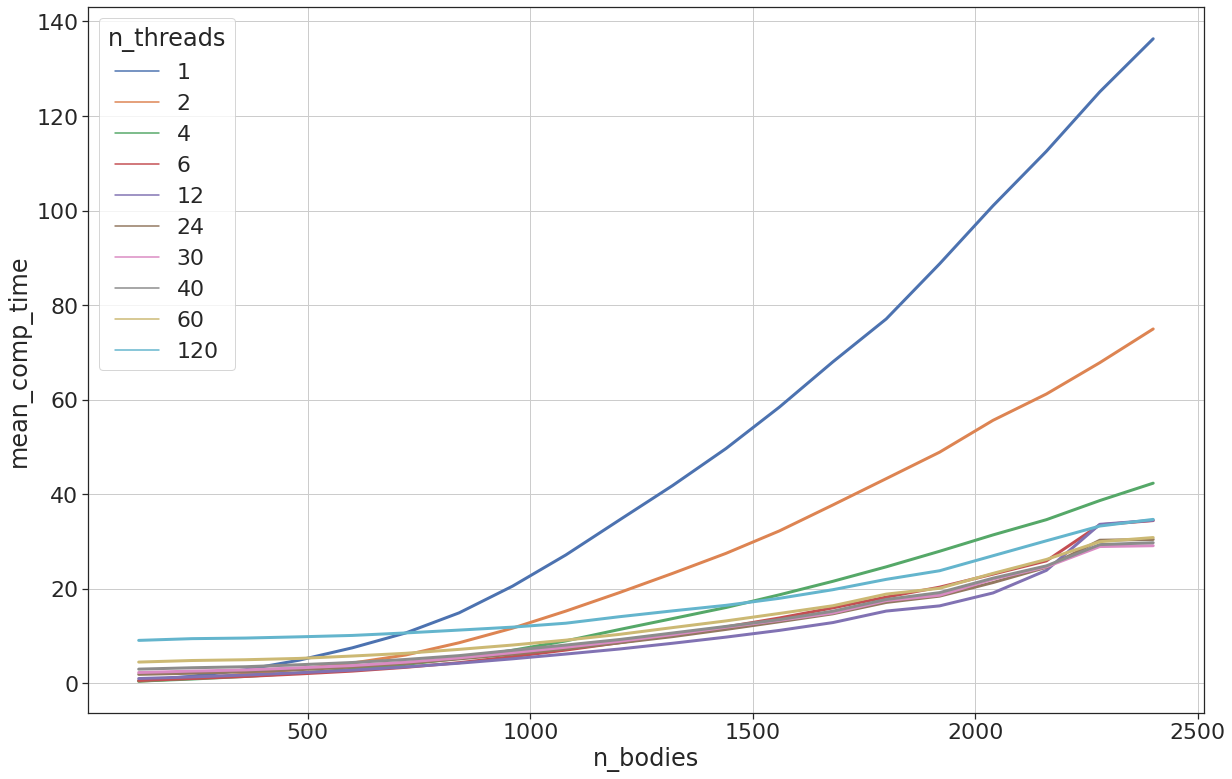

In [119]:
sns.lineplot(
    stat,
    x='n_bodies',
    y='mean_comp_time',
    hue='n_threads',
    linewidth = 3
);

In [120]:
stat_pivot = pd.pivot(stat, 'n_bodies', 'n_threads', 'mean_comp_time')
stat_pivot

/tmp/ipykernel_1919132/3093451584.py:1: FutureWarning: In a future version of pandas all arguments of pivot except for the argument 'data' will be keyword-only.
  stat_pivot = pd.pivot(stat, 'n_bodies', 'n_threads', 'mean_comp_time')


n_threads,1,2,4,6,12,24,30,40,60,120
n_bodies,,,,,,,,,,
120,0.526916,0.454431,0.465987,0.593191,1.016659,1.896535,2.289448,3.001967,4.495042,9.081855
240,1.497445,1.074455,0.908224,1.010113,1.351270,2.138176,2.588074,3.292371,4.826344,9.449035
360,2.867456,1.930916,1.461090,1.447588,1.755203,2.442368,2.838252,3.511401,4.989464,9.574489
480,4.882682,3.014842,2.161921,1.980148,2.235580,2.881689,3.282609,3.926334,5.266215,9.833177
600,7.504984,4.278048,2.972073,2.585212,2.781040,3.453066,3.761127,4.403482,5.771696,10.128805
720,10.653068,5.988738,4.003718,3.381844,3.469350,4.209355,4.481182,5.046672,6.351936,10.656559
840,14.902065,8.577927,5.297023,4.362632,4.258567,5.164465,5.389112,5.857364,7.180896,11.261431
960,20.543235,11.658066,6.985856,5.633553,5.179667,6.142458,6.485519,6.974716,8.096821,11.885097
1080,27.154531,15.279922,8.969464,7.037925,6.193784,7.277200,7.634803,8.095881,9.132948,12.716018


In [121]:
stat

,n_bodies,n_threads,n_retries,mean_comp_time,hyper_threading
0,120,1,21,0.526916,True
1,120,2,21,0.454431,True
2,120,4,21,0.465987,True
3,120,6,21,0.593191,True
4,120,12,21,1.016659,True
...,...,...,...,...,...
195,2400,24,10,30.430409,True
196,2400,30,11,29.106956,True
197,2400,40,11,29.736714,True
198,2400,60,10,30.832672,True


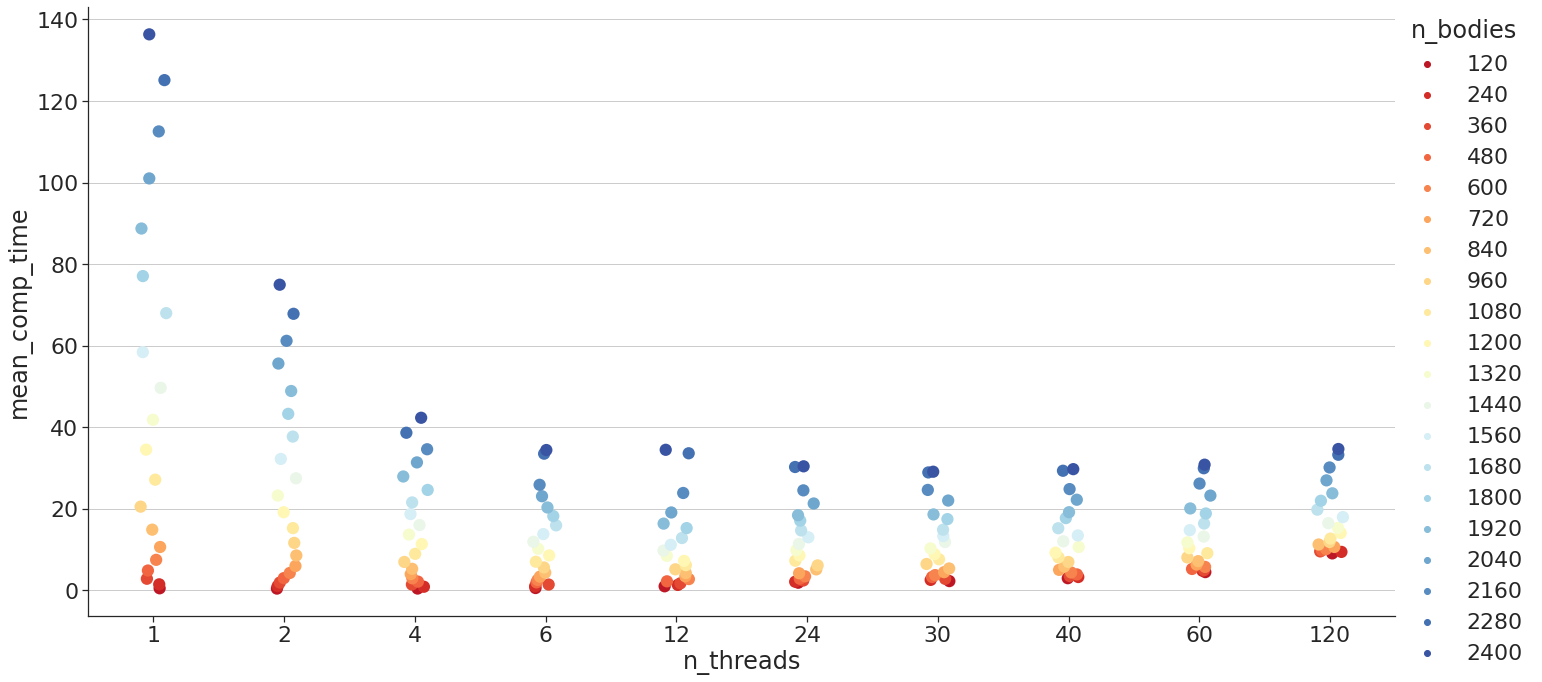

In [124]:
sns.catplot(
    stat,
    x='n_threads',
    y='mean_comp_time',
    hue='n_bodies',
#     kind='line',
    aspect=2,
    height=10,
    s=150,
    palette=sns.color_palette('RdYlBu', n_colors=20),
);

In [132]:
stat

,n_bodies,n_threads,n_retries,mean_comp_time,hyper_threading
0,120,1,21,0.526916,True
1,120,2,21,0.454431,True
2,120,4,21,0.465987,True
3,120,6,21,0.593191,True
4,120,12,21,1.016659,True
...,...,...,...,...,...
195,2400,24,10,30.430409,True
196,2400,30,11,29.106956,True
197,2400,40,11,29.736714,True
198,2400,60,10,30.832672,True


In [169]:
stat_single_time = stat.query('n_threads == 1')[['n_bodies', 'mean_comp_time']].set_index('n_bodies')
stat_single_time

,mean_comp_time
n_bodies,
120,0.526916
240,1.497445
360,2.867456
480,4.882682
600,7.504984
720,10.653068
840,14.902065
960,20.543235
1080,27.154531


In [170]:
stat['n_bodies'] / stat['mean_comp_time']
# stat_single_time[line['n_bodies']] / line['mean_comp_time']

KeyError: "None of [Int64Index([ 120,  120,  120,  120,  120,  120,  120,  120,  120,  120,\n            ...\n            2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400],\n           dtype='int64', length=200)] are in the [columns]"

In [171]:
!ls

a.out  experiments  out     README.md	 src
data   generate.sh  Python  scripts.txt  test.sh


In [ ]:
!python3 ./Python/